# 文件处理

读写文件是最常见的IO操作。Python内置了读写文件的函数，用法和C是兼容的。

读写文件前，我们先必须了解一下，在磁盘上读写文件的功能都是由操作系统提供的，现代操作系统不允许普通的程序直接操作磁盘，所以，读写文件就是请求操作系统打开一个文件对象（通常称为文件描述符），然后，通过操作系统提供的接口从这个文件对象中读取数据（读文件），或者把数据写入这个文件对象（写文件）。

### 文件的打开方法

open() 返回一个 file object ，最常使用的是两个位置参数和一个关键字参数：`open(filename, mode, encoding=None)`\

`file`：文件路径，可以是绝对路径或相对路径。\
`mode`：文件操作模式（见下表）。\
`encoding`：文件编码（如处理文本文件时常用 utf-8）。

常见的文件操作模式：
|模式	|描述|
|-------|----|
|'r'	|只读模式（默认）。文件必须存在，否则会报错。|
|'w'	|写入模式。如果文件存在，会清空原内容；如果不存在，会创建新文件。|
|'x'	|创建模式。如果文件存在，会报错。|
|'a'	|追加模式。在文件末尾添加内容。如果文件不存在，会创建新文件。|
|'b'	|二进制模式（可与其他模式组合使用，如 'rb'、'wb'）。|
|'t'	|文本模式（默认）。与二进制模式互斥。|
|'+'	|读写模式（可与其他模式组合使用，如 'r+'、'w+'）。|

我们打开文件之后，用完之后一定要记得释放掉, 通过 `文件对象.close()`关闭释放资源

## 读文件

In [18]:
f = open('./data/test.txt', 'r', encoding='utf-8')

f只是一个文件对象，同样他也是一个可迭代对象，这里我们在暂时不考虑可迭代性

文件对象`f`会有各种各样的操作，读数据，写数据等等，这里我们只给了读数据，所以我们这里就先讲述读数据的方法

In [19]:
f.read()

'hello world1\nhello world2\nhello world3\nhello world4\nhello world5\nhello world6\nhello world7\nhello world8\nhello world9\nhello world10\nhello world11\nhello world12\nhello world13\n'

使用完这个文件之后，需要将这个文件关闭掉，这里我们先手动关闭

In [29]:
# 手动关闭
f.close()

所以读取文件的步骤主要有3步：\
1.打开这个文件\
2.对这个文件进行操作\
3.操作完关闭这个文件

上面的操作，很容易忽略掉关闭文件这个的操作，所以我们可以用异常处理进行

In [20]:
try:
    f = open('./data/test.txt', 'r', encoding='utf-8')
    data = f.read()
except FileNotFoundError as e:
    print(e)
finally:
    f.close()

这样写，不管怎么样最后都会关闭这个文件，但是这个写内容又太多了，有没有更简单的方式啦，我们可以用`with` 上下文管理器来进行

In [23]:
# 上下文管理器
with open('./data/test.txt', 'r', encoding='utf-8') as f:
    '''
    f只能在这个代码块中使用
    但是这里不是产生的作用域，而是在这个代码块结束时，会最后执行f.close()的代码，将这个文件关闭掉
    '''
    print(f.read(2))  # 读取所有的内容

he


读取文件常用的方法\
`read(size=-1)`方法：读取文件的全部内容或指定大小的字符数。默认读取全部内容。\
`readline(size=-1)`方法：读取一行内容，若指定大小则读取指定大小的字符数。\
`readlines(hint=-1)`方法：读取文件的所有行，并以列表形式返回。可通过 hint 限制总字节数。

In [26]:
# 1.read(size=-1)
with open('./data/test.txt', 'r', encoding='utf-8') as f:
    print(f.read(5))  # 读取5个字符

hello


In [27]:
with open('./data/test.txt', 'r', encoding='utf-8') as f:
    print(f.read())  # 默认读取所有字符

hello world1
hello world2
hello world3
hello world4
hello world5
hello world6
hello world7
hello world8
hello world9
hello world10
hello world11
hello world12
hello world13



In [29]:
# 2.f.readline()
with open('./data/test.txt', 'r', encoding='utf-8') as f:
    # 每次最多读取一行数据,默认读取一行数据
    print(f.readline())  # 读取一行

hello world1



In [30]:
with open('./data/test.txt', 'r', encoding='utf-8') as f:
    # 若指定大小则读取指定大小的字符数
    print(f.readline(2))  # 一次至多读取一行

he


In [31]:
# 3.f.readlines()
with open('./data/test.txt', 'r', encoding='utf-8') as f:
    print(f.readlines())
    '''
    默认读取所有行的数据，然后存储到一个列表中
    注意：至少读取一行数据，以行为单位读取
    '''
    f.seek(0)
    print(f.readlines(2)) 

['hello world1\n', 'hello world2\n', 'hello world3\n', 'hello world4\n', 'hello world5\n', 'hello world6\n', 'hello world7\n', 'hello world8\n', 'hello world9\n', 'hello world10\n', 'hello world11\n', 'hello world12\n', 'hello world13\n']
['hello world1\n']


补充:文件指针\
文件指针是用来指示文件当前读取或写入位置的一个内部游标。 当通过 open() 打开一个文件时，文件指针默认指向文件的开头（文件的第一个字节）。

文件读取的流程：

当使用诸如 readline() 或 read() 等读取方法时，文件指针会从当前位置读取数据，并自动向前移动，直到读取完成。\
比如：\
`readline()`：读取一行内容，文件指针移动到下一行的起始位置。\
`read(n)`：读取 n 个字符或字节，文件指针移动 n 个字符的距离。\
`read()`：读取整个文件，文件指针移动到文件末尾。\
文件指针的状态：

每次读取操作后，文件指针的位置会更新为最新的位置，因此连续调用读取操作会逐行或逐块读取文件内容。

我们可以通过 `file.seek()` 方法手动调整文件指针的位置，例如移动到文件开头或其他位置。

## 写入文件内容
`write(data)`:写入字符串内容。\
`writelines(lines)`:将字符串列表写入文件

In [39]:
with open('./data/example.txt', 'w', encoding='utf-8') as file:
    file.write("Hello, Python!")
    file.write("Hello, Python!")
    file.write("\n Hello world")


In [41]:
with open('./data/example.txt', 'w', encoding='utf-8') as file:
    file.write("Hello, Python!\n")
    file.writelines(["Line 1\n", "Line 2\n"])

我们没有这个文件，会自动创建一个文件，然后写入，注意：打开文件，文件指针都指向开始位置，所以这里的操作是覆写，我们想要追加就需要有一个`a`号

In [42]:
with open('./data/example.txt', 'a', encoding='utf-8') as file:
    file.write("Hello, Python!\n")
    file.writelines(["Line 1\n", "Line 2\n"])

常见复合模式
通过组合上述模式，可以满足更复杂的需求：

|模式	|描述|
|-------|---|
|'rb'	|以二进制模式读文件。常用于读取图片、音频等二进制文件。|
|'wb'	|以二进制模式写文件。文件不存在会创建新文件，存在则清空内容重新写入。|
|'ab'	|以二进制模式追加文件。文件不存在会创建新文件，写入内容追加到末尾。|
|'r+'	|读写模式（文本模式）。文件必须存在，允许读写文件内容。|
|'w+'	|读写模式（文本模式）。文件不存在会创建新文件，存在则清空内容重新写入。|
|'a+'	|读写模式（文本模式）。文件不存在会创建新文件，允许在文件末尾追加内容并读取文件内容。|
|'rb+'	|二进制模式下的读写。文件必须存在，允许读取和写入二进制文件内容。|
|'wb+'	|二进制模式下的读写。文件不存在会创建新文件，存在则清空内容重新写入。|
|'ab+'	|二进制模式下的读写。文件不存在会创建新文件，允许在末尾追加内容并读取文件内容。|

## 读取二进制文件
我们通过`rb`读取二进制文件

In [43]:
with open('./data/Python_logo.jpg', mode='rb') as f:
    b_data = f.read()
    print(f.name)  # 路径 相对路径
    print(f.mode)  # 读取模型
    print(b_data)  # 具体读取的数据

./data/Python_logo.jpg
rb
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x00\x00\x00\x00\x00\xff\xe1\x00.Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x02@\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00@\x01\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\n\x07\x07\t\x07\x06\n\t\x08\t\x0b\x0b\n\x0c\x0f\x19\x10\x0f\x0e\x0e\x0f\x1e\x16\x17\x12\x19$ &%# #"(-90(*6+"#2D26;=@@@&0FKE>J9?@=\xff\xdb\x00C\x01\x0b\x0b\x0b\x0f\r\x0f\x1d\x10\x10\x1d=)#)==================================================\xff\xc0\x00\x11\x08\x01\xd8\x01\xda\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8

通过上述的方式，我们读取到的都是二进制编码，我们读取二进制文件，不需要指定读取的编码格式的类型，因为是直接读取的字节流，而非字符流

这样的读取方式，我们看到的是这个图片的字节流，那我们想看到一张图片怎么操作

1.使用pillow模块, Pillow 是 Python 中处理图像的常用库，可以用来读取、展示和保存图像。

```bash
pip install pillow
```
在命令行 虚拟环境中，执行上述命令，安装pillow模块

In [44]:
from PIL import Image

# 读取并展示图片
image_path = './data/Python_logo.jpg'

# 打开图像文件
with open(image_path, 'rb') as file:
    img = Image.open(file)  # 使用 Pillow 打开二进制文件
    img.show()              # 在默认图像查看器中显示图像

2.使用matplotlib模块， matplotlib 是一个数据可视化库，可以用来展示图像数据。

```bash
pip install matplotlib
```
在命令行 虚拟环境中，执行上述命令，安装matplotlib模块

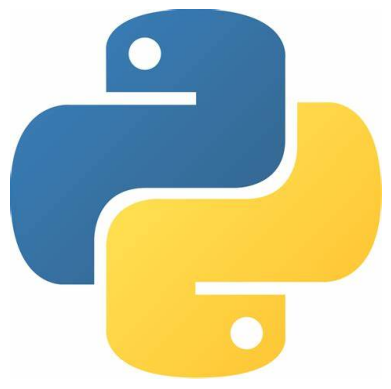

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 读取并展示图片
image_path = './data/Python_logo.jpg'

# 使用 matplotlib 读取图像
img = mpimg.imread(image_path)

# 显示图像
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.show()

## 文件指针操作
`tell()`:返回文件指针的当前位置（字节位置）。\
`seek(offset, whence=0)`:移动文件指针到指定位置。whence 表示参考点（0 开头，1 当前，2 末尾）。

In [51]:
with open('./data/example.txt', 'r', encoding='utf-8') as file:
    file.seek(5)  # 将指针移动到第5个字节位置
    print(file.read(5))  # 从第5个字节开始读取
    print(file.tell())

, Pyt
10


## 文件状态检查
`closed`	检查文件是否已经关闭。
`name`	返回文件的名称。
`mode`	返回文件的打开模式。

In [52]:
file = open("./data/example.txt", 'r', encoding='utf-8')

In [53]:
file.closed

False

In [54]:
file.close()

In [55]:
file.closed

True

In [4]:
file.name

'./data/example.txt'

In [5]:
file.mode

'r'

## 与操作系统和文件系统交互

在python中os模板提供了许多与操作系统和文件系统交互的函数

In [56]:
# 导入os
import os

1. os.getcwd()：函数检查当前的工作目录
2. os.listdir(path)：列出目录下的所有文件和子目录
3. os.makedirs(path):递归创建多级目录
4. os.remove(path)：删除该路径下的文件
5. os.rename(src, dst)：重命名文件或目录

In [58]:
os.getcwd()  # 得到这个文件的路径

'E:\\code_data\\python\\teaching\\class_1\\python_study\\11_chapter_文件处理'

In [59]:
os.listdir()  # 默认使用当前路径 返回该路径下, 所有的内容

['01_文件处理.ipynb',
 '02_项目练习.ipynb',
 'index.ipynb',
 '.ipynb_checkpoints',
 'data',
 'imgs',
 '00_projects',
 '03_其他类型文件的读取.ipynb']

In [60]:
os.listdir('./data')

['emi1.csv',
 'emis3.txt',
 'example.txt',
 'loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'Python_logo.jpg',
 'szy_logo.jpg',
 'test.txt',
 '.ipynb_checkpoints',
 'json_data.json',
 'json_out.json',
 'yaml_data.yaml',
 'config.yaml',
 'yaml_out.yaml',
 'test_tell.txt']

In [61]:
# 创建一个test/test01/test02的目录
os.makedirs('./test/test01/test02', exist_ok=True)  # 当这个路径存在时就会报错 可以使用exist_ok这个参数，设置为True|

In [64]:
# 删除test01目录下的test01.txt文件
os.remove('./test/test01.txt')

FileNotFoundError: [WinError 2] 系统找不到指定的文件。: './test/test01.txt'

In [65]:
# 删除test02这个目录
os.rmdir('./test/test01/test02')  # 前提是这个目录是空的

In [66]:
# 将test01修改名字为test1
os.rename('./test/test01', './test/test1')